## Deluppgift 1
Ev. kommentar: 

Programmet ger förväntat resultat vilket jag är nöjd med. Om jag hade haft mer tid till att studera hade jag velat förenkla min kod ytterligare. Just nu går det säkert för ett tränat öga att följa min förståelse för programmering i takt med att ni läser min kod för uppgifterna. Kommentering var svårare än väntat då jag inte har vana att veta vad jag ska förklara. Jag har skrivit kortare kommentarer till höger om koden och för längre förklaringar eller "rubriker" (för att bli mer lättläst) ligger kommentarer ovanför berört stycke. 

Jag har ett problem med mitt program som jag har jobbat mig runt men som jag gärna skulle vilja få feedback på. Det verkar handla om shallow vs deep copy. Varje deluppgift innehåller en eller flera egendefinierade funktioner. Som jag förstått boken och internet så inom funktioner och t ex for-satser så är variabler lokala och ändringar som sker där i blir inte globala. Mitt bekymmer har varit att listorna som skapas här i deluppgift 1 har blivit globalt korrigerade även inom funktioner, satser och även kopior som jag skapat av listorna med hjälp av t ex append, copy osv. Jag noterar i markdown-fälten senare så det går att se vad/var jag menar. 

In [1]:
import csv

# Nedan: en funktion som öppnar en CSV-fil och skapar en 2D-lista av innehållet. 

def read_file(filnamn):
    with open(filnamn, 'r', encoding='UTF-8') as file:                   # UTF-8 för att att "åäö" ska fungera. 
        data_list = []                      
        csv_reader = csv.reader(file, delimiter = ';')
        for rad in csv_reader:                                  
            data_list.append(rad)                               
        return data_list

kpiData = read_file('kpi-1.csv') 
livsmedelData = read_file('livsmedel-1.csv') 
tjansteData = read_file('tjänster-1.csv') 

# Nedan: Några rader ur listorna för att kontrollera korrekt inmatning

print(f'Andra raden ur listan "kpiData": \n{kpiData[1]}\n')
print(f'Tredje raden ur listan "livsmedelData": \n{livsmedelData[2]}\n')
print(f'Fjärde raden ur listan "tjansteData": \n{tjansteData[3]}\n')

Andra raden ur listan "kpiData": 
['2022', '350.56', '353.56', '359.8', '362.02', '365.82', '370.95', '371.28']

Tredje raden ur listan "livsmedelData": 
['kött', '100.00', '120.09', '138.13', '156.83', '179.89', '193.95', '203.52', '213.21', '229.82', '248.12', '267.10', '266.73', '254.71', '249.53', '249.04', '238.19', '219.15', '217.80', '215.20', '212.59', '215.45', '227.01', '232.81', '230.90', '229.61', '230.16', '233.69', '236.08', '252.13', '259.64', '261.45', '261.06', '266.56', '276.07', '274.85', '277.50', '281.50', '285.07', '289.85', '297.17', '310.64', '315.13']

Fjärde raden ur listan "tjansteData": 
['boende', '100', '114.21', '123.59', '129.63', '138.26', '149.91', '153.73', '159.16', '170.02', '182.99', '210.63', '250.13', '268.91', '284.3', '289.5', '296.35', '302.53', '300.4', '294.8', '289.92', '292.13', '303.63', '312.08', '325.64', '326.15', '327.32', '338.76', '352.35', '376.44', '356.24', '355.7', '386.7', '392.07', '389.03', '385.68', '375.82', '379.01', '388.

## Deluppgift 2
Ev. kommentar: 

Problemet med shallow vs deep copy kommer redan här. Jag använder mig av "global" för att återställa kpiData så inte deluppgift 5 som också använder den listan ska bli felaktig. Som jag förstått inlämningen borde det inte vara förbjudet att i en annan funktion kalla på en tidigare funktion, vi skulle bara inte klistra in all kod för funktionerna på nytt. 

Visa KPI för månad (1-12): 4


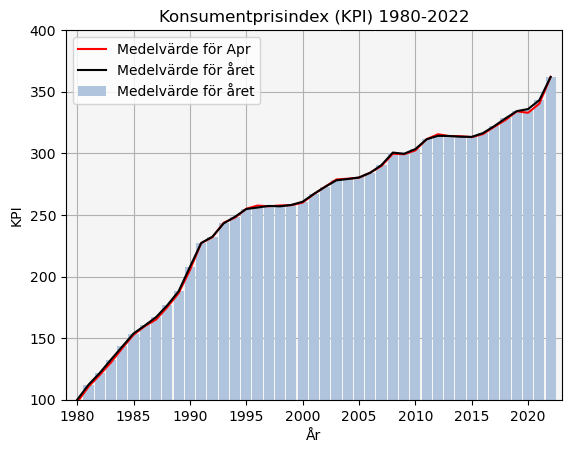

In [2]:
import matplotlib.pyplot as plt

# Nedan: en funktion för summering av tal där inargumentetet är en lista.

def summering(x):
    s = 0.0
    for rad in x:
        s = s + rad
    return s

# Nedan: en funktion för medelvärdesberäkning av tal där inargumentetet är en lista.

def medelvardesberakning(x):
    s = summering(x)                                              # använder summering() så kod blir kortare och mer lättläst
    m = s / len(x)
    return m

def kpi_medelvarde(lista):
    
    # Nedan: medelvarde_per_ar görs global för att senare kunna användas i deluppgift 5. \
    #  kpiData görs global bara för att kunna återställa
    
    global kpiData, medelvarde_per_ar
    
    # Nedan: för att slippa konvertera element till korrekt typ (string/integer/float) i varje uträkning \
    #  som jag gör senare så formaterar jag string, integer och float redan här. 
    
    kpi = []
    for rad in lista:
        kpi.append(rad)
    for rad in range(1, len(kpi)):                                
        kpi[rad][0] = int(kpi[rad][0])                            
        for kolumn in range(1, len(kpi[rad])):
            kpi[rad][kolumn] = float(kpi[rad][kolumn])
    
    # Nedan: skapar en ny lista utifrån den månad som användaren anger
    
    vald_manad = int(input('Visa KPI för månad (1-12): '))
    data_vald_manad = []
    for rad in kpi[1:]:
        if vald_manad < len(rad):
            data_vald_manad.append(rad[vald_manad])
    data_vald_manad.reverse()
            
    # Nedan: en lista med medelvärden för varje år
    
    medelvarde_per_ar = []
    for rad in range(1, len(kpi)):
        varden = kpi[rad][1:]
        medelvarde = medelvardesberakning(varden)
        medelvarde_per_ar.append(medelvarde)
    medelvarde_per_ar.reverse()                                   # omvänd lista för att få en positiv trend i grafen
    
    # Nedan: en graf över prisutvecklingen
    
    artal = []                                                    # plockar ut årtalen ur listan för att använda som x-axel
    for rad in range(1, len(kpi)):
        artal.append(kpi[rad][0])
    artal.reverse()
    
    manader = kpi[0]                                              # plockar ut månaderna för visa vald månad i plt.legend
    manader.append(kpi[0])
    manad_label = f'Medelvärde för {manader[vald_manad]}'
    
    if len(artal) != len(data_vald_manad):
        plt.plot(artal[:-1], data_vald_manad, color = 'red', label = manad_label, zorder = 3)
    else:
        plt.plot(artal, data_vald_manad, color = 'red', label = manad_label, zorder = 3)
    plt.plot(artal, medelvarde_per_ar, color = 'k', label = 'Medelvärde för året', zorder = 4)
    plt.bar(artal, medelvarde_per_ar, width = 0.9, color = 'lightsteelblue', label = 'Medelvärde för året', zorder = 2)
    
    plt.ylim(100, 400)
    plt.xlim(1979, 2023)
    plt.title('Konsumentprisindex (KPI) 1980-2022')
    plt.xlabel('År')
    plt.ylabel('KPI')
    plt.grid(zorder = 0)
    b = plt.gca()
    b.set_facecolor('whitesmoke')
    plt.legend()
    plt.show()
    
    # Nedan: återställer lokala ändringar som blivit på kpiData genom att kalla på funktionen i deluppgift 1. 
    
    kpiData = read_file('kpi-1.csv')

kpi_medelvarde(kpiData)

## Deluppgift 3
Ev. kommentar: 

Shallow vs deep copy. Det var här jag först noterade att det blev ett bekymmer. Till exempel, i kodrad 10 och 15 kommer jag att ta bort vissa värden ur listan. Som ni ser har jag försökt göra en funktion som ska kunna kopiera värden ur en ursprunglig lista utan att ändra ursprunglig lista. Det fungerar dock inte. Därför har jag varit tvungen att återställa listorna från uppg 1 i slutet av funktionen igen. 

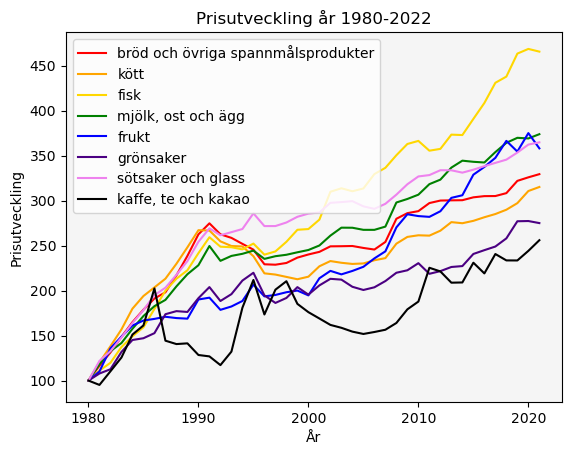

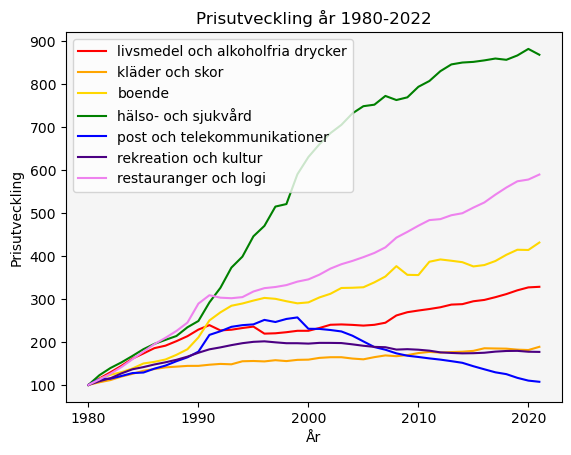

In [3]:
def deep_copy(original_lista):
    kopierad_lista = []
    for rad in original_lista:
        kopierad_lista.append(rad)
    return kopierad_lista

def plotta_data(lista):
    y = deep_copy(lista)
    x = y.pop(0)                                                 # Plocka ut årtalen för x-koordinaten. 
    del x[0]
    x = [int(w) for w in x]                                      # Gör om alla string-årtal till integers. 
    labels = []
    for rad in y:                                                # Första kolumnen blir labels till legend. 
        labels.append(rad[0])
        del rad[0]
    for a in y:                                                  # Gör om all data, i varje rad, till floats. 
        for b, c in enumerate(a):
            a[b] = float(c)
    a = y[0]
    b = y[1]
    c = y[2]
    d = y[3]
    e = y[4]
    f = y[5]
    g = y[6]
    if len(y) == 8:                                              # Eftersom antalet rader skiljer sig mellan listorna. 
        h = y[7]
    plt.plot(x, a, color = 'red', label = labels[0])
    plt.plot(x, b, color = 'orange', label = labels[1])
    plt.plot(x, c, color = 'gold', label = labels[2])
    plt.plot(x, d, color = 'green', label = labels[3])
    plt.plot(x, e, color = 'blue', label = labels[4])
    plt.plot(x, f, color = 'indigo', label = labels[5])
    plt.plot(x, g, color = 'violet', label = labels[6])
    if len(y) == 8:                                              # Eftersom antalet rader skiljer sig mellan listorna. 
        plt.plot(x, h, color = 'black', label = labels[7])
    plt.title('Prisutveckling år 1980-2022')
    plt.xlabel('År')
    plt.ylabel('Prisutveckling')
    b = plt.gca()
    b.set_facecolor('whitesmoke')
    plt.legend()
    plt.show()
    
    global livsmedelData, tjansteData
    livsmedelData = read_file('livsmedel-1.csv') 
    tjansteData = read_file('tjänster-1.csv') 
    
plotta_data(livsmedelData)
plotta_data(tjansteData)

## Deluppgift 4
Ev. kommentar:

Även här gör jag en global återställning av listorna från uppg 1. 

+-------------------------------------------------------------------------+
|Kategorier av varor och tjänster         |Prisutvecklingen i procentform |
+=========================================+===============================+
|livsmedel och alkoholfria drycker        |228.36                         |
+-----------------------------------------+-------------------------------+
|kläder och skor                          |88.68                          |
+-----------------------------------------+-------------------------------+
|boende                                   |331.43                         |
+-----------------------------------------+-------------------------------+
|hälso- och sjukvård                      |768.47                         |
+-----------------------------------------+-------------------------------+
|post och telekommunikationer             |7.29                           |
+-----------------------------------------+-------------------------------+
|rekreation 

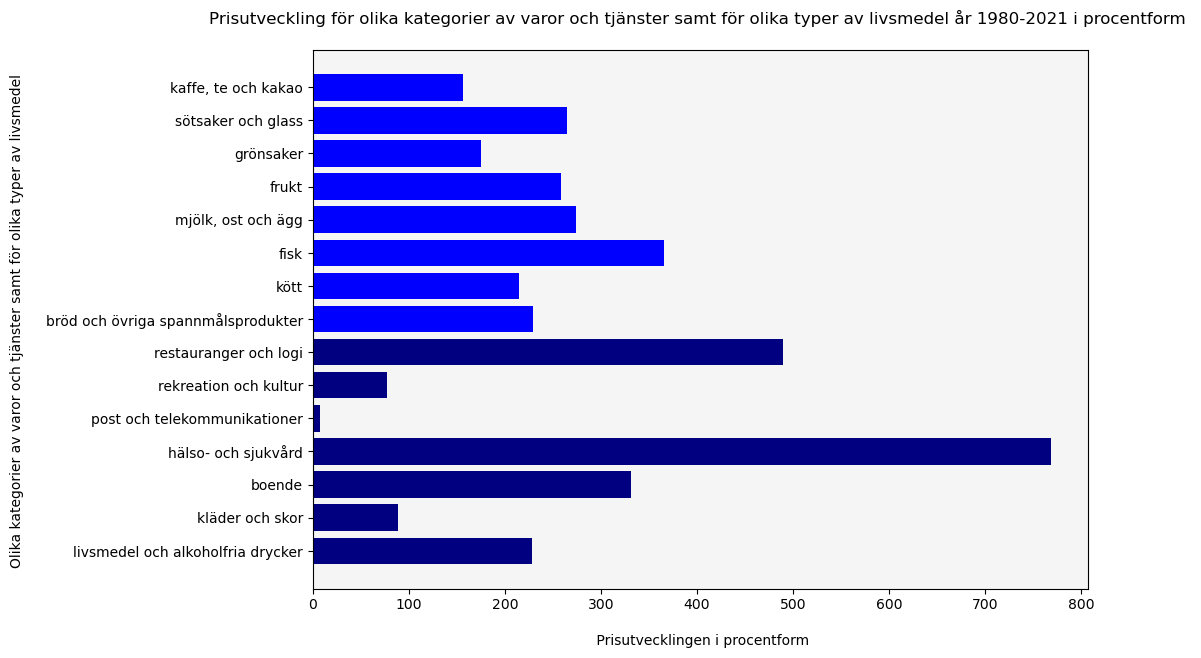

In [4]:
def tabell_diagram():
    
    global livsmedelData, tjansteData                            # Då jag inte lyckas göra lokala kopior av Data-listorna
    
    # Nedan: beräkna och plocka ut all nödvändig data från listorna. 
    
    del livsmedelData[0]                                         # Ta bort årtalen
    del tjansteData[0] 

    livsmedelData_kategorier = []
    tjansteData_kategorier = []
    for rad in livsmedelData:                                    # Plocka ut kategorierna och lägg i varsin variabel
        livsmedelData_kategorier.append(rad[0])
        del rad[0]
    for rad in tjansteData:
        tjansteData_kategorier.append(rad[0])
        del rad[0]
    
    for a in livsmedelData:                                      # Gör om data till floats
        for b, c in enumerate(a):
            a[b] = float(c)
    for a in tjansteData: 
        for b, c in enumerate(a):
            a[b] = float(c)

    livsmedelData_max = []                                      # Plocka ut en lista av slutvärdet per rad
    tjansteData_max = []
    for rad in livsmedelData:
        livsmedelData_max.append(rad[len(rad)-1])
    for rad in tjansteData:
        tjansteData_max.append(rad[len(rad)-1])
    
    livsmedelData_procent = []                                  # Maxvärdet minus originalvärdet för att få ökningen 
    tjansteData_procent = []
    for rad in livsmedelData_max:
        rad = rad-100
        livsmedelData_procent.append(rad)
    for rad in tjansteData_max:
        rad = rad-100
        tjansteData_procent.append(rad)

    
    # Nedan: skriver ut tabellen och infogar all data från stycket ovan
    
    kolumn1_1 = 'Kategorier av varor och tjänster'
    kolumn1_2 = 'Kategorier av olika typer av livsmedel'
    kolumn2 = 'Prisutvecklingen i procentform'
    p = '|'
    outliner = '+-------------------------------------------------------------------------+'
    oneliner = '+-----------------------------------------+-------------------------------+'
    twoliner = '+=========================================+===============================+'
    
    print(outliner)
    print(f'{p}{kolumn1_1:41}{p}{kolumn2:<31}{p}')
    print(twoliner)
    c = 0
    for rad in tjansteData_kategorier:
        print(f'{p}{rad:41}{p}{tjansteData_procent[c]:<31.2f}{p}')
        c = c + 1
        if c == len(tjansteData_kategorier):
            print(outliner)
        else:
            print(oneliner)
    print(outliner)
    print(f'{p}{kolumn1_2:41}{p}{kolumn2:<31}{p}')
    print(twoliner)
    c = 0
    for rad in livsmedelData_kategorier:
        print(f'{p}{rad:41}{p}{livsmedelData_procent[c]:<31.2f}{p}')
        c = c + 1
        if c == len(livsmedelData_kategorier):
            print(outliner)
        else:
            print(oneliner)
    
    
    # Nedan: skriver ut ett horisontellt diagram utifrån beräknad data
    
    plt.figure(figsize=(10,7))
    plt.barh(tjansteData_kategorier, tjansteData_procent, color = 'navy')
    plt.barh(livsmedelData_kategorier, livsmedelData_procent, color = 'blue')
    plt.title('Prisutveckling för olika kategorier av varor och tjänster samt för olika typer av livsmedel år 1980-2021 i procentform \n')
    plt.xlabel('\n Prisutvecklingen i procentform')
    plt.ylabel('Olika kategorier av varor och tjänster samt för olika typer av livsmedel \n')
    b = plt.gca()
    b.set_facecolor('whitesmoke')
    plt.show()
    
    # Nedan: återställer de ursprungliga listorna
    
    livsmedelData = read_file('livsmedel-1.csv') 
    tjansteData = read_file('tjänster-1.csv') 


tabell_diagram()

## Deluppgift 5
Ev. kommentar:


                    ANALYS AV KPI UNDER ÅREN 2000 - 2022                    
                    ------------------------------------                    

                    Största förändring
                    ------------------

År                  %            månad                  Årsmedelvärde
-------------------------------------------------------------------------- 

2000                0.69         Sep                    260.72
2001                0.87         Apr                    267.08
2002                0.89         Mar                    272.84
2003                0.87         Feb                    278.10
2004                0.76         Mar                    279.15
2005                0.71         Sep                    280.41
2006                -0.78        Jan                    284.22
2007                1.0          Sep                    290.51
2008                -1.3         Dec                    300.61
2009                -0.46        Jul               

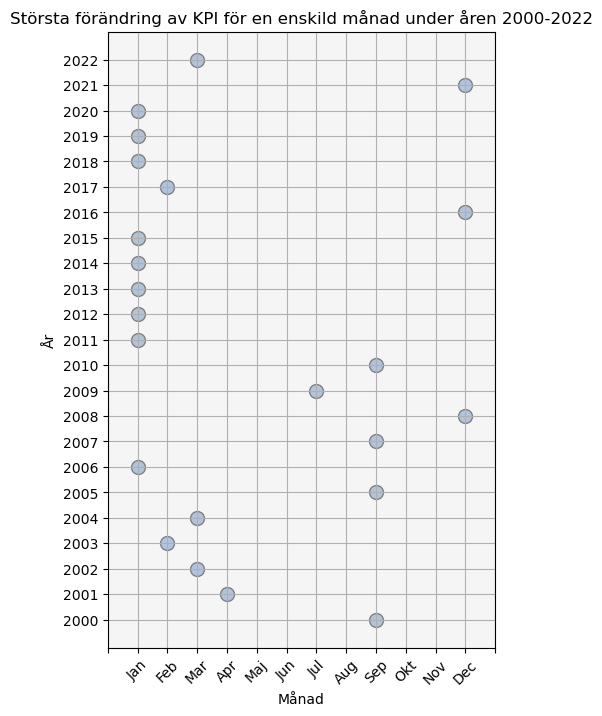

In [5]:
# En funktion som analyserar största givna förändring per månad och presenterar data i en tabell och ett punktdiagram 

def analys_kpi(lista):
    
    # Nedan: gör en lokal kopia av inmatad lista med formaterade element för att kunna analyseras senare 
    
    kpi = []
    for rad in lista:
        kpi.append(rad)
    for rad in range(1, len(kpi)):                                # För att slippa att konvertera i varje rad senare \
        kpi[rad][0] = int(kpi[rad][0])                            #  korrigerar jag string, integer och float redan här
        for kolumn in range(1, len(kpi[rad])):
            kpi[rad][kolumn] = float(kpi[rad][kolumn])
    manader = kpi.pop(0)                                          # För att inte råka påverka globala kpiData så \
    kpi2000 = []                                                  #  plockar jag ut årtalen här och inte direkt i kpiData
    for rad in range(len(kpi)):
        if kpi[rad][0] >= 2000:
            kpi2000.append(kpi[rad])
    kpi2000.append(manader)
    kpi2000.reverse()
    medelvarde2000 = medelvarde_per_ar.copy()                     # lokal kopia av variabel från deluppg 2, till tabellen
    medelvarde2000 = ['{:.2f}'.format(x) for x in medelvarde2000]
    medelvarde2000 = medelvarde2000[20:]
    medelvarde2000.reverse()
    medelvarde2000.append('Årsmedelvärde')                        # adderar ett extra element så len() är samma som kpi2000
    medelvarde2000.reverse()
    
    # Nedan: tabellhuvud med rubriker och kolumnnamn
    
    oneliner = '--------------------------------------------------------------------------'
    twoliner = '=========================================================================='
    titel = 'ANALYS AV KPI UNDER ÅREN 2000 - 2022'
    titel_understreck = '------------------------------------'
    rubrik = 'Största förändring'
    rubrik_understreck = '------------------'
    mellanslag = ' '
    År = 'År'
    procent = '%'
    månad = 'månad'
    Årsmedelvärde = 'Årsmedelvärde'
    print(twoliner,'\n\n', f'{titel:^74}', '\n', f'{titel_understreck:^74}', '\n')
    print(f'{mellanslag:20}{rubrik}')
    print(f'{mellanslag:20}{rubrik_understreck}\n')
    print(f'{År:20}{procent:13}{månad:23}{Årsmedelvärde}')
    print(oneliner, '\n')

    # Nedan: skapar en lista med all data till tabellen
    
    tabell_varden = []                                                        # varje rad är ett element med flera värden
    storsta_forandring = []                                                   # här har varje rad flera unika element
    diagram_varden = []                                                       # samma här så att jag kan plocka värden enklare
    for rad in range(1, len(kpi2000)):
        max_procentskillnad = 0
        max_manad = None
        klocka = 0
        for kolumn in range(1, len(kpi2000[rad])):
            if (rad == 1) and (kolumn == 1):                                  # skippa januari år 2000 pga 1:a månaden
                continue
            elif kolumn == 1:
                nuvarande = kpi2000[rad][1]                                   # januari beräknas med hjälp av \
                foregaende = kpi2000[rad-1][-1]                               #  föregående rads december
                procentskillnad = (nuvarande - foregaende) / foregaende * 100
                if abs(procentskillnad) > abs(max_procentskillnad):           # abs() på båda variabler annars plockar \
                    max_procentskillnad = procentskillnad                     #  den bara största positiva skillnaden
                    max_manad = kpi2000[0][kolumn]
            else:                                                             # beräkna feb-dec
                nuvarande = kpi2000[rad][kolumn]
                foregaende = kpi2000[rad][kolumn-1]
                procentskillnad = (nuvarande - foregaende) / foregaende * 100
                if abs(procentskillnad) > abs(max_procentskillnad):           # abs() på båda variabler annars plockar \
                    max_procentskillnad = procentskillnad                     #  den bara största positiva skillnaden
                    max_manad = kpi2000[0][kolumn]
        arsmedelvarde = medelvarde2000[rad]
        tabell_varden.append(f'{kpi2000[rad][0]:<20}{max_procentskillnad:<13.2}{max_manad:23}{arsmedelvarde}')
        storsta_forandring.append([kpi2000[rad][0], max_procentskillnad, max_manad])
        diagram_varden.append([kpi2000[rad][0], max_manad])
    storsta_forandring_varde = 0.0
    storsta_forandring_manad = None
    storsta_forandring_ar = 0
    for year, value, month in storsta_forandring:                             # här vill jag bara ha värden till sista \
        if value > storsta_forandring_varde:                                  #  meningen "Största förändring" i tabellen
            storsta_forandring_varde = value
            storsta_forandring_manad = month
            storsta_forandring_ar = year
    
    # Nedan: infoga data i tabellen
    
    for rad in tabell_varden:   
        print(rad)
    Största_förändring = 'Största förändring'
    print(f'\n{Största_förändring:<20}{storsta_forandring_varde:<13.3}{storsta_forandring_manad} {storsta_forandring_ar}')
    print(f'\n{twoliner}')
    
    # Nedan: skapa ett punktdiagram som visar vilken månad per år som hade störst förändring

    plt.figure(figsize=(5,8))
    numerisk_data = []
    for i, j in diagram_varden:
        numerisk_manad = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 
                          'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 
                          'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}[j]
        numerisk_data.append([i, numerisk_manad])
    sorterad_data = sorted(numerisk_data, key = lambda x: x[1])
    ar = [i for i, j in sorterad_data]
    manader = [j for i, j in sorterad_data]
    manader_labels = kpi2000[0][1:]
    manader_labels.reverse()
    manader_labels.append('')                                                 # adderar tomt värde pga formatering av graf
    manader_labels.reverse()
    manader_labels.append('')                                                 # adderar tomt värde pga formatering av graf
    plt.scatter(manader, ar, color = 'lightsteelblue', s = 100, edgecolor = 'grey')
    plt.xticks(range(0, len(manader_labels)), manader_labels, rotation = 45)
    plt.yticks(range(min(ar), max(ar)+1, 1))
    plt.xlabel("Månad")
    plt.ylabel("År")
    plt.title("Största förändring av KPI för en enskild månad under åren 2000-2022")
    plt.grid(True)
    b = plt.gca()
    b.set_facecolor('whitesmoke')
    plt.show()
    
analys_kpi(kpiData)

## Deluppgift 6
Ev. kommentar:

In [ ]:
# En funktion som kontinuerligt ber använder om input och kallar på önskad funktion

def meny():
    
    while True:
        print('=============================================================================================================================')
        print('\n \033[1m Program för att läsa in och analysera resultatet i uppgift 1 – 5 \033[0m \n \n' \
             ,'1. Läser in csv-filerna \n' \
             ,'2. Konsumentprisindex under åren 1980 – 2022 \n' \
             ,'3. Prisutvecklingen för de olika kategorierna i filerna ”Varor och tjänster” samt ”Livsmedel” under åren 1980 – 2021 \n' \
             ,'4. Prisutvecklingen i procentform för de olika kategorierna i filerna ”Varor och tjänster” samt ”Livsmedel” under åren 1980 – 2021 \n' \
             ,'5. Förändringar i KPI under åren 2000 – 2022 \n' \
             ,'6. Avsluta programmet \n')
        print('=============================================================================================================================')
        menyval = input('\n Välj menyalternativ (1–6): ')   # anger ny rad i början i stället för i varenda menyval

        if menyval == '1':
            print('===\n 1 \n===')                          # bara för att göra det mer lättläst vilket menyval som gjorts
            def filkontroll():                              # en funktion för att "korrekturläsa input"
                klocka = 0
                korrekta_filnamn = ['kpi-1.csv', 'tjänster-1.csv', 'livsmedel-1.csv']
                global kpiData, tjansteData, livsmedelData
                while klocka < 3:
                    filnamn = input(f'Ange filnamnet du vill öppna, \neller tryck {chr(0x23CE)} Enter för att fortsätta: ')
                    if filnamn in korrekta_filnamn:
                        klocka += 1
                        if filnamn == 'kpi-1.csv':
                            kpiData = read_file(filnamn)
                            print('Filen "kpi-1.csv" är inläst.')
                        if filnamn == 'tjänster-1.csv':
                            tjansteData = read_file(filnamn)
                            print('Filen "tjänster-1.csv" är inläst.')
                        if filnamn == 'livsmedel-1.csv':
                            livsmedelData = read_file(filnamn)
                            print('Filen "livsmedel-1.csv" är inläst.')
                    elif len(filnamn) == 0:
                        kpiData = read_file('kpi-1.csv')
                        tjansteData = read_file('tjänster-1.csv')
                        livsmedelData = read_file('livsmedel-1.csv')
                        print('Filerna "kpi-1.csv", "tjänster-1.csv" och "livsmedel-1.csv" är inlästa.')
                        klocka = 3
                    else: 
                        print('Felaktigt filnamn angivet, försök igen.')
            filkontroll()
            print()
            print(f'Andra raden ur listan "kpiData": \n{kpiData[1]}\n')
            print(f'Tredje raden ur listan "livsmedelData": \n{livsmedelData[2]}\n')
            print(f'Fjärde raden ur listan "tjansteData": \n{tjansteData[3]}\n')
        
        elif menyval == '2':
            print('===\n 2 \n===')
            kpi_medelvarde(kpiData)
        
        elif menyval == '3':
            print('===\n 3 \n===')
            plotta_data(livsmedelData)
            plotta_data(tjansteData)
        
        elif menyval == '4':
            print('===\n 4 \n===')
            tabell_diagram()
        
        elif menyval == '5':
            print('===\n 5 \n===')
            analys_kpi(kpiData)
        
        elif menyval == '6':
            print('\nProgrammet är avslutat.')
            break                                           # enklare och kortare än att ge en variabel True/False
        
        else:
            print('Felaktigt menyval, försök igen.\n')

meny()